In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [296]:
# SMAPE Calculator (competition-metric taken from geeksforgeeks)
def calculate_smape(actual, predicted) -> float:
  
    # Convert actual and predicted to numpy
    # array data type if not already
    if not all([isinstance(actual, np.ndarray), 
                isinstance(predicted, np.ndarray)]):
        actual, predicted = np.array(actual),
        np.array(predicted)
  
    return round(
        np.mean(
            np.abs(predicted - actual) / 
            ((np.abs(predicted) + np.abs(actual))/2)
        )*100, 4
    )

In [6]:
from dateutil.easter import easter
from datetime import datetime, date, timedelta
import holidays
from holidays import CountryHoliday

# Import data

In [7]:
train_data_ori = pd.read_csv('train.csv')
train_data_ori

,id,date,country,store,product,num_sold
0,0,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,63
1,1,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,66
2,2,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People,9
3,3,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,59
4,4,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better,49
...,...,...,...,...,...,...
136945,136945,2021-12-31,Spain,Kagglazon,Using LLMs to Improve Your Coding,700
136946,136946,2021-12-31,Spain,Kagglazon,Using LLMs to Train More LLMs,752
136947,136947,2021-12-31,Spain,Kagglazon,Using LLMs to Win Friends and Influence People,111
136948,136948,2021-12-31,Spain,Kagglazon,Using LLMs to Win More Kaggle Competitions,641


In [8]:
test_data_ori = pd.read_csv('test.csv')
test_data_ori

,id,date,country,store,product
0,136950,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding
1,136951,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs
2,136952,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People
3,136953,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions
4,136954,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better
...,...,...,...,...,...
27370,164320,2022-12-31,Spain,Kagglazon,Using LLMs to Improve Your Coding
27371,164321,2022-12-31,Spain,Kagglazon,Using LLMs to Train More LLMs
27372,164322,2022-12-31,Spain,Kagglazon,Using LLMs to Win Friends and Influence People
27373,164323,2022-12-31,Spain,Kagglazon,Using LLMs to Win More Kaggle Competitions


In [9]:
train_data_ori.date = pd.to_datetime(train_data_ori.date)
test_data_ori.date = pd.to_datetime(test_data_ori.date)

# Feature Engineering

Abbreviation:
- IYC: Using LLMs to Improve Your Coding
- TTL: Using LLMs to Train More LLMs
- WFIP: Using LLMs to Win Friends and Influence People
- WMKC: Using LLMs to Win More Kaggle Competitions
- WB: Using LLMs to Write Better

In [10]:
gdp_df = pd.read_csv('Gdp_data.csv', skiprows=4)
gdp_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.791061e+09,2.963128e+09,2.983799e+09,3.092179e+09,3.276188e+09,3.395794e+09,2.610039e+09,3.126019e+09,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,2.112502e+10,2.161623e+10,2.350628e+10,2.804836e+10,2.592067e+10,2.947210e+10,...,1.006526e+12,9.273485e+11,8.851764e+11,1.021043e+12,1.007196e+12,1.000834e+12,9.275933e+11,1.081998e+12,1.169484e+12,NaN
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,2.055058e+10,1.999814e+10,1.801955e+10,1.889635e+10,1.841886e+10,1.890450e+10,2.014345e+10,1.458314e+10,NaN,NaN
3,Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,1.044764e+10,1.117321e+10,1.199053e+10,1.272769e+10,1.389811e+10,1.492979e+10,...,8.943225e+11,7.686447e+11,6.913634e+11,6.848988e+11,7.670257e+11,8.225384e+11,7.864600e+11,8.444597e+11,8.778633e+11,NaN
4,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.372444e+11,8.721930e+10,4.984049e+10,6.897277e+10,7.779294e+10,6.930911e+10,5.024137e+10,6.568544e+10,1.067136e+11,NaN


In [11]:
def add_gdp(data):
    df = data.copy()
    min_year = min(df.date.dt.year)
    max_year = max(df.date.dt.year)
    years = list(range(min_year,max_year+1))
#     df[f'gdp_{2022}'] = 0
#     for year in years:
#         df[f'gdp_{year}'] = 0
    df['gdp'] = 0
    for c in list(set(train_data_ori.country)):
#         country_gdp = gdp_df.loc[gdp_df['Country Name']==c,'2017':'2022']
        for year in years:
            df['gdp'] = np.where(
                (df.country==c)&(df['Year']==year),np.log(gdp_df.loc[gdp_df['Country Name']==c, str(year)]/1e+9),df['gdp']
            )
    return df

In [12]:
country_gdp=gdp_df.loc[gdp_df['Country Name']=='Spain','2017':'2022']
# pd.DataFrame(preprocessing.normalize(country_gdp), columns=country_gdp.columns).mean().mean()
(country_gdp.mean().mean()/1e+9)

1371.8534565903847

Functions below provided by [RAVI RAMAKRISHNAN](https://www.kaggle.com/code/ravi20076/tpssep22-featureengineeringpipeline) on Kaggle and modified by me

In [159]:
def create_dateFeature(data):
    df = data.copy()
    imp_dates = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 16,17,22,
                 124, 125, 126, 127, 140, 141, 167, 168, 
                 169, 170, 171, 173, 174, 175, 176, 177, 178, 179, 
                 180, 181, 203, 230, 231, 232, 233, 234, 282, 289, 
                 290, 307, 308, 309, 310, 311, 312, 313, 317, 318, 
                 319, 320, 360, 361, 362, 363, 364, 365]
    df['Year'] = df.date.dt.year.astype(np.int16)
    df['Qtr'] = df['date'].dt.quarter.astype(np.int8)
    df["Month"] = df["date"].dt.month.astype(np.int8)
    df["Month_Sin"] = (np.sin(df['Month'] * (2 * np.pi / 12))).astype(np.float32)
    df["Day"] = df["date"].dt.day.astype(np.int16)
    df["Day_Sin"] = (np.sin(df['Day'] * (2 * np.pi / 12))).astype(np.float32)
    df["Weekday"] = df["date"].dt.dayofweek.astype(np.int8)
    df['Week_Nb'] = np.clip(df['date'].dt.isocalendar().week, a_min = 0, a_max= 52)
    df['Is_Weekend'] = np.where(df['Weekday'] >= 5,1,0)
    df["DayofYear"] = df["date"].dt.dayofyear
    df["is_fri"] = df["Weekday"]==4
    df["is_sat"] = df["Weekday"]==5
    df["is_sat"] = df["Weekday"]==6
    df["is_weekday"] = df["Weekday"]<4
    df["DayofYear"] = \
        df.apply(lambda x: x["DayofYear"]-1 
                 if (x["date"] > pd.Timestamp("2020-02-29") and x["date"] < pd.Timestamp("2021-01-01"))  
                 else x["DayofYear"], axis=1)
    df['Is_ImpDate'] = df['DayofYear'].apply(lambda x: x if x in imp_dates else 0);
    
    # covid dates
#     covid_concern = pd.Timestamp('2020-01-30')
    covid_pandemic = pd.Timestamp('2020-04-01')
#     arg_first_case = pd.Timestamp('2020-03-03')
#     can_first_case = pd.Timestamp('2020-01-27')
#     jp_first_case = pd.Timestamp('2020-01-16')
#     sp_first_case = pd.Timestamp('2020-01-31',)
#     es_first_case = pd.Timestamp('2020-02-27')
    
    df['is_covid'] = (df.date.dt.year==2020)
#     df['world_pandemic_covid'] = (df['date']==covid_pandemic)
        
#     for day in (list(range(-5, 40))):
#         df[f'covid_{day}'] = (df.date - covid_pandemic).dt.days.eq(day)
          
#     df.drop(['Day','Weekday'], axis=1, inplace=True)
        
    return df

In [289]:
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess
def add_fourier(df):
    tempDf = df.copy()
#     tempDf.set_index('date', inplace=True).to_period('D')
    month = df.date.dt.month
#     fourier = CalendarFourier(freq='M', order=12)
#     dp = DeterministicProcess(index=tempDf.index, 
#                               constant=False, order=1, seasonal=False, 
#                               additional_terms=[fourier], drop=True)
    for k in range(1,2):
        tempDf[f'sin{k}'] = np.sin(month / 12 * 2 * np.pi * k)
        tempDf[f'cos{k}'] = np.cos(month / 12 * 2 * np.pi * k)
        tempDf[f'IYC_sin{k}'] = tempDf[f'sin{k}'] * tempDf['Using LLMs to Improve Your Coding']
        tempDf[f'IYC_cos{k}'] = tempDf[f'cos{k}'] * tempDf['Using LLMs to Improve Your Coding']
        tempDf[f'TTL_sin{k}'] = tempDf[f'sin{k}'] * tempDf['Using LLMs to Train More LLMs']
        tempDf[f'TTL_cos{k}'] = tempDf[f'cos{k}'] * tempDf['Using LLMs to Train More LLMs']
        tempDf[f'WMKC_sin{k}'] = tempDf[f'sin{k}'] * tempDf['Using LLMs to Win More Kaggle Competitions']
        tempDf[f'WMKC_cos{k}'] = tempDf[f'cos{k}'] * tempDf['Using LLMs to Win More Kaggle Competitions']
        tempDf[f'WB_sin{k}'] = tempDf[f'sin{k}'] * tempDf['Using LLMs to Write Better']
        tempDf[f'WB_cos{k}'] = tempDf[f'cos{k}'] * tempDf['Using LLMs to Write Better']
    return tempDf

In [84]:
from sklearn.preprocessing import SplineTransformer
def DoSplineXform(period, n_splines = None, degree=3):
    """
    This function performs spline transform preprocessing on the provided data-frame
    """
    
    if n_splines is None: n_splines = period
    n_knots = n_splines + 1
    return SplineTransformer(degree=degree, n_knots=n_knots, 
                             knots=np.linspace(0, period, n_knots).reshape(n_knots, 1),
                             extrapolation="periodic",
                             include_bias=True
                            )

def MakeSplineFtre(hours = np.arange(1,32)):
    """
    This function makes spline features from the data
    """
    
    hour_df    = pd.DataFrame(np.linspace(1, 32, 32).reshape(-1, 1),columns= ["Day"])
    splines    = DoSplineXform(32, n_splines=4).fit_transform(hour_df)
    splines_df = pd.DataFrame(splines,columns=[f"spline{i}" for i in range(splines.shape[1])])
    splines_df = pd.concat([pd.Series(hours, name='Day'), splines_df], axis="columns")
    
    return splines_df

In [85]:
def make_features(df):
    print("adding date features ...")
    tempDf = create_dateFeature(df)
    print("adding GDP features ...")
    tempDf = add_gdp(tempDf)
    
    countries = list(set(train_data_ori['country']))
    products = list(set(train_data_ori['product']))
    stores = list(set(train_data_ori['store']))
#     products.remove('Using LLMs to Win Friends and Influence People')
#     stores.remove('Kaggle Learn')
    print("adding dummies ...")
    for c in countries:
        tempDf[f'country_{c}'] = tempDf.country == c
        
    for p in products:
        tempDf[f'{p}'] = tempDf['product'] == p
        
    for s in stores:
        tempDf[f'store_{s}'] = tempDf.store == s
        
    print("adding fourier ...")    
    tempDf = add_fourier(tempDf)
    Spline_Prf = MakeSplineFtre()
    tempDf = tempDf.merge(Spline_Prf, on = 'Day', how = 'left')
    tempDf.drop(['store','country','product'], axis=1, inplace=True)
    tempDf = tempDf.loc[~tempDf.date.between(pd.Timestamp('2020-03-01'), pd.Timestamp('2020-06-30'))]
    return tempDf

In [86]:
train_eng = make_features(train_data_ori)
train_eng.set_index('date', drop=False, inplace=True)
train_eng.iloc[12000:12010]

adding date features ...
adding GDP features ...
adding dummies ...
adding fourier ...


,id,date,num_sold,Year,Qtr,Month,Month_Sin,Day,Day_Sin,Weekday,...,TTL_sin1,TTL_cos1,WMKC_sin1,WMKC_cos1,WB_sin1,WB_cos1,spline0,spline1,spline2,spline3
date,,,,,,,,,,,,,,,,,,,,,
2017-06-10,12000,2017-06-10,40,1,2,6,1.224647e-16,10,-0.866025,5,...,0.000000e+00,-0.0,0.000000e+00,-0.0,0.000000e+00,-0.0,0.002604,0.070312,0.611979,0.315104
2017-06-10,12001,2017-06-10,36,1,2,6,1.224647e-16,10,-0.866025,5,...,1.224647e-16,-1.0,0.000000e+00,-0.0,0.000000e+00,-0.0,0.002604,0.070312,0.611979,0.315104
2017-06-10,12002,2017-06-10,5,1,2,6,1.224647e-16,10,-0.866025,5,...,0.000000e+00,-0.0,0.000000e+00,-0.0,0.000000e+00,-0.0,0.002604,0.070312,0.611979,0.315104
2017-06-10,12003,2017-06-10,29,1,2,6,1.224647e-16,10,-0.866025,5,...,0.000000e+00,-0.0,1.224647e-16,-1.0,0.000000e+00,-0.0,0.002604,0.070312,0.611979,0.315104
2017-06-10,12004,2017-06-10,34,1,2,6,1.224647e-16,10,-0.866025,5,...,0.000000e+00,-0.0,0.000000e+00,-0.0,1.224647e-16,-1.0,0.002604,0.070312,0.611979,0.315104
2017-06-10,12005,2017-06-10,60,1,2,6,1.224647e-16,10,-0.866025,5,...,0.000000e+00,-0.0,0.000000e+00,-0.0,0.000000e+00,-0.0,0.002604,0.070312,0.611979,0.315104
2017-06-10,12006,2017-06-10,56,1,2,6,1.224647e-16,10,-0.866025,5,...,1.224647e-16,-1.0,0.000000e+00,-0.0,0.000000e+00,-0.0,0.002604,0.070312,0.611979,0.315104
2017-06-10,12007,2017-06-10,9,1,2,6,1.224647e-16,10,-0.866025,5,...,0.000000e+00,-0.0,0.000000e+00,-0.0,0.000000e+00,-0.0,0.002604,0.070312,0.611979,0.315104
2017-06-10,12008,2017-06-10,45,1,2,6,1.224647e-16,10,-0.866025,5,...,0.000000e+00,-0.0,1.224647e-16,-1.0,0.000000e+00,-0.0,0.002604,0.070312,0.611979,0.315104


# Building Models

In [74]:
from matplotlib.ticker import MaxNLocator, FormatStrFormatter, PercentFormatter
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GroupKFold
from sklearn.linear_model import LinearRegression, HuberRegressor, Ridge, Lasso

In [87]:
X = train_eng.drop(['id','num_sold','date'], axis=1).astype('float')
y = np.log(train_eng['num_sold'].values).reshape(-1,1)

In [88]:
features = list(X.columns)
print(features)

['Year', 'Qtr', 'Month', 'Month_Sin', 'Day', 'Day_Sin', 'Weekday', 'Week_Nb', 'Is_Weekend', 'DayofYear', 'is_fri', 'is_sat', 'is_weekday', 'Is_ImpDate', 'is_covid', 'gdp', 'country_Estonia', 'country_Canada', 'country_Argentina', 'country_Spain', 'country_Japan', 'Using LLMs to Train More LLMs', 'Using LLMs to Win More Kaggle Competitions', 'Using LLMs to Win Friends and Influence People', 'Using LLMs to Improve Your Coding', 'Using LLMs to Write Better', 'store_Kaggle Learn', 'store_Kaggle Store', 'store_Kagglazon', 'sin1', 'cos1', 'IYC_sin1', 'IYC_cos1', 'TTL_sin1', 'TTL_cos1', 'WMKC_sin1', 'WMKC_cos1', 'WB_sin1', 'WB_cos1', 'spline0', 'spline1', 'spline2', 'spline3']


In [89]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [90]:
def build_model(X, y, model_name='linear'):
    if model_name=='ridge':
        model = Ridge()
    else:
        model = LinearRegression()
    model.fit(X, y)
        
    return model

In [91]:
def resid_plot(country, store, product, model, f_eng_name, features):
    example_df = pd.DataFrame({'id': 0,
                            'date': pd.date_range('2017-01-01', '2022-12-31', freq='D'),
                            'country': country,
                            'store': store,
                            'product': product})
    example_df = f_eng_name(example_df)
    example_df['num_sold'] = np.exp(model.predict(scaler.transform(example_df[features])))
    example_df = example_df.groupby(example_df['date']).mean()
    plt.figure(figsize=(20, 6))
    plt.plot(example_df.index, example_df.num_sold, label='prediction')
    ori_df = train_data_ori[(train_data_ori.country==country)&(train_data_ori.store==store)&(train_data_ori['product']==product)]
    ori_df = ori_df.groupby('date').mean()
    plt.scatter(ori_df.index, ori_df.num_sold, label='true', alpha=0.5, color='red', s=3)
    plt.legend()
    plt.title('Predictions and true num_sold for 6 years')
    plt.show()

In [92]:
def predict_plot(model, f_eng_name, features):
    example_df = pd.concat([train_data_ori, test_data_ori])
    example_df = f_eng_name(example_df)
    example_df['num_sold'] = np.exp(model.predict(scaler.transform(example_df[features])))
    example_df = example_df.groupby(example_df['date']).mean()
    plt.figure(figsize=(20, 6))
    plt.plot(example_df.index, example_df.num_sold, label='prediction')
    ori_df = train_data_ori.copy()
    ori_df = ori_df.groupby('date').mean()
    plt.scatter(ori_df.index, ori_df.num_sold, label='true', alpha=0.5, color='red', s=3)
    plt.legend()
    plt.title('All Predictions and true num_sold for 6 years')
    plt.show()

## Building Models without Holidays

adding date features ...
adding GDP features ...
adding dummies ...
adding fourier ...


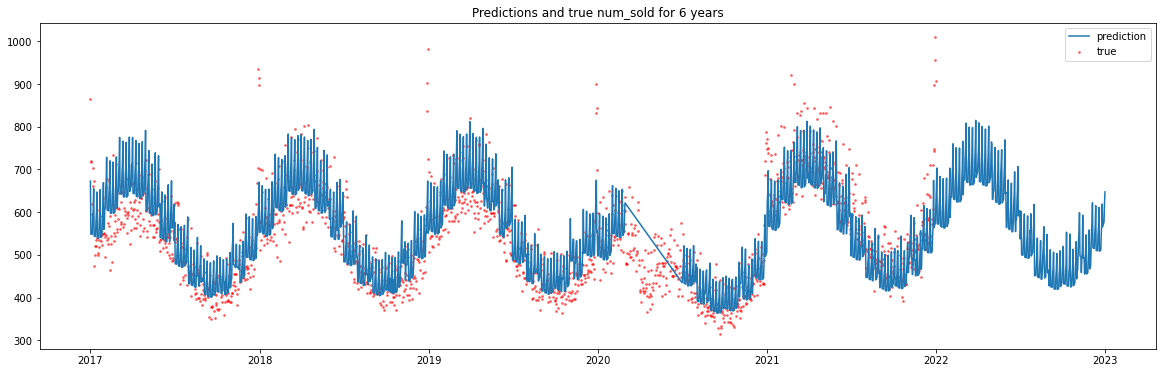

In [93]:
model1 = build_model(X_scaled, y.ravel(), 'ridge')
resid_plot('Canada', 'Kagglazon', 'Using LLMs to Write Better', model1, make_features, features)

Model adjust well to growth/decline with GDP feature.

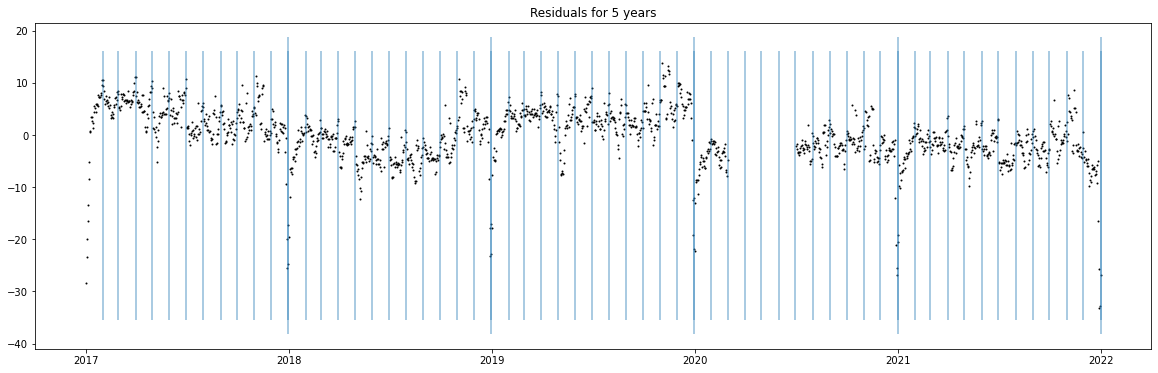

In [94]:
train_eng['pred'] = np.exp(model1.predict(scaler.transform(train_eng.drop(['id','num_sold','date'], axis=1))))
group_date = train_eng.groupby(train_eng['date'])
residuals = (group_date.pred.sum() - group_date.num_sold.sum()) / (group_date.pred.sum() + group_date.num_sold.sum()) * 200

def plot_all_residuals(residuals):
    plt.figure(figsize=(20,6))
    plt.scatter(residuals.index,
                residuals,
                s=1, color='k')
    plt.vlines(pd.date_range('2017-01-01', '2022-01-01', freq='M'),
               plt.ylim()[0], plt.ylim()[1], alpha=0.5)
    plt.vlines(pd.date_range('2017-01-01', '2022-01-01', freq='Y'),
               plt.ylim()[0], plt.ylim()[1], alpha=0.5)
    plt.title('Residuals for 5 years')
    plt.show()
    
plot_all_residuals(residuals)

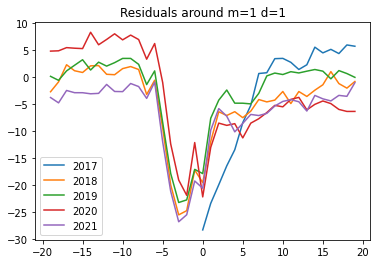

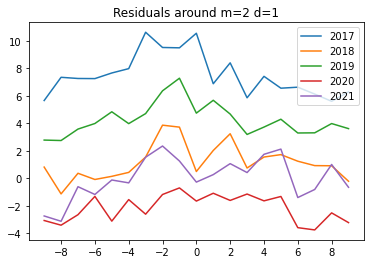

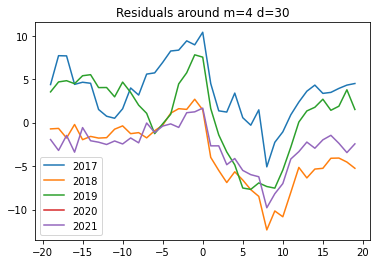

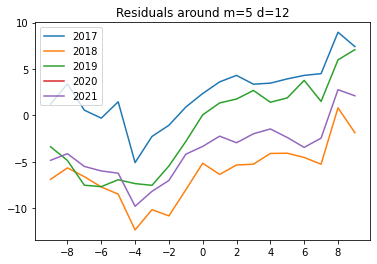

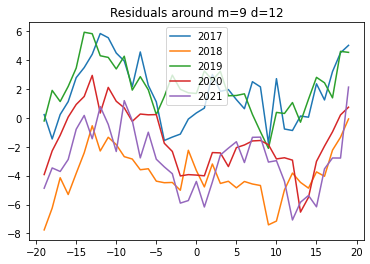

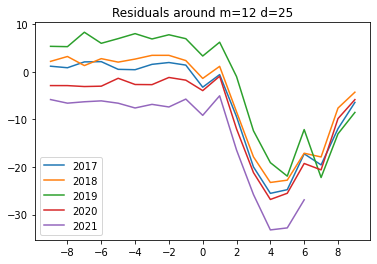

In [95]:
def plot_around(residuals, m, d, w):
    """Plot residuals in an interval of with 2*w around month=m and day=d"""
    plt.figure()
    plt.title(f"Residuals around m={m} d={d}")
    for y in np.arange(2017, 2022):
        d0 = pd.Timestamp(date(y, m, d))
        residual_range = residuals[(residuals.index > d0 - timedelta(w)) & 
                                   (residuals.index < d0 + timedelta(w))]
        plt.plot([(r - d0).days for r in residual_range.index], residual_range, label=str(y))
    plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True)) # only integer labels
    plt.legend()
    plt.show()
plot_around(residuals, 1, 1, 20)
plot_around(residuals, 2, 1, 10)
plot_around(residuals, 4, 30, 20)
plot_around(residuals, 5, 12, 10)
plot_around(residuals, 9, 12, 20)
plot_around(residuals, 12, 25, 10)

Abbreviation:
- IYC: Using LLMs to Improve Your Coding
- TTL: Using LLMs to Train More LLMs
- WFIP: Using LLMs to Win Friends and Influence People
- WMKC: Using LLMs to Win More Kaggle Competitions
- WB: Using LLMs to Write Better

High residuals mainly are located in:
- Early January (New Year). It is particularly higher in 2017.
- Around end of April to early May (Post-Easter/Golden week in Japan)

Additional interesting months from EDA:
- February (lowest sales of IYC, TTL, WFIP)
- March - May (Highest sales of WB)
- May (Highest sales of TTL in Japan)
- June (lowest sales of WMKC)
- July (lowest sales of WMKC in Estonia)
- September (lowest sales of WB)
- Japan does not consider Christmas as a national holiday
- Estonia has high sales during end of July.

We could use them as an interaction with addition of holidays such as Christmas and New Year that accomodates high sales during that time.

In [28]:
def eng_easter(data):
    df = data.copy()
    easter_date = df.date.apply(lambda date: pd.Timestamp(easter(date.year)))       
    for day in (list(range(-2, 8))+list(range(40,48))):
        df[f'Easter_{day}'] = (df.date - easter_date).dt.days.eq(day)
        
    for col in df.columns :
            if 'Easter' in col : df = pd.get_dummies(df, columns = [col], drop_first=True)
    
    return df

In [188]:
def holiday_mapper(data):
    df = data.copy()
    period = range(2017, 2022, 1)
    for i in list(set(train_data_ori['country'])):
        holidays = CountryHoliday(i, years=period)
        df['Holiday'] = df['date'].map(holidays).fillna('Not Holiday')
        
        df['Holiday'] = df['Holiday'].apply(lambda x: x 
                                                  if x != 'Asunción de la Virgen (Trasladado)' 
                                                  else 'Not Holiday')
        df['Is_Holiday'] = np.where(df['Holiday']=='Not Holiday',0,1)
    
    df.drop('Holiday', axis=1,inplace=True)
#     
#     df['is_christmas_ny'] = (
#         (df.country!='Japan') &
#         ((df.Month==12) & ((df.Day>=25) & (df.Day<=31)) | (df.Month==1) & (df.Day==1))
#     )
#     newyear_jan_date = df.date.apply(lambda date: pd.Timestamp(date.year,1,1))
#     newyear_dec_date = df.date.apply(lambda date: pd.Timestamp(date.year,12,31))
#     for day in (list(range(11))):
#         df[f'newYearJan_{day}'] = np.where(df.country!='Japan',(df.date - newyear_jan_date).dt.days.eq(day),0)
#     for day in (list(range(-5,1))):
#         df[f'newYearDec_{day}'] = np.where(df.country!='Japan',(df.date - newyear_dec_date).dt.days.eq(day),0)
    
#     # Applying christmas and excluding Japan
#     christmas_date = df.date.apply(lambda date: pd.Timestamp(date.year,12,25))       
#     for day in (list(range(-4,7))):
#         df[f'Christmas_{day}'] = np.where(df.country!='Japan',(df.date - christmas_date).dt.days.eq(day),0)

    for d in range(25,32):
        c_day = df.date.apply(lambda date: pd.Timestamp(date.year,12,d))
        df[f'Christmas_{d}'] = np.where(df.country!='Japan',(df.date - c_day).dt.days.eq(0),0)
    for d in range(1,10):
        ny_day = df.date.apply(lambda date: pd.Timestamp(date.year,1,d))
        df[f'newYear_{d}'] = (df.date - ny_day).dt.days.eq(0)    
        
    return df

In [219]:
def add_jp_holiday(data):
    df = data.copy()
        
#     showa_day = df.date.apply(lambda date: pd.Timestamp(date.year,4,29))       
#     for day in (list(range(-2, 4))):
#         df[f'showa_{day}'] = np.where(df.country=='Japan',(df.date - showa_day).dt.days.eq(day),0)
#     constitution_memorial_day = df.date.apply(lambda date: pd.Timestamp(date.year,5,3)) 
#     for day in (list(range(8))):
#         df[f'constitution_{day}'] = np.where(df.country=='Japan',(df.date - constitution_memorial_day).dt.days.eq(day),0)
#     greenery_day = df.date.apply(lambda date: pd.Timestamp(date.year,5,4)) 
#     for day in (list(range(-1, 7))):
#         df[f'greenery_{day}'] = np.where(df.country=='Japan',(df.date - greenery_day).dt.days.eq(day),0)
#     children_day = df.date.apply(lambda date: pd.Timestamp(date.year,5,5)) 
#     for day in (list(range(-2, 6))):
#         df[f'children_{day}'] = np.where(df.country=='Japan',(df.date - children_day).dt.days.eq(day),0)

    for d in range(4,15):
        gw_day = df.date.apply(lambda date: pd.Timestamp(date.year,5,d))
        df[f'goldenWeek_{d}'] = np.where(df.country=='Japan',(df.date - gw_day).dt.days.eq(0),0)
#     df['goldenWeek'] = np.where((df.country=='Japan'), ((df.date>=showa_day)&(df.date<=children_day)),0)
    
    return df

In [218]:
def add_ind_day(data):
    df = data.copy()
    dates_list = [
             (5,3),
             (6,24),
             (7,1),
             (12,6),
             (7,9),
           ]
    countries = ['Japan','Estonia', 'Canada', 'Spain', 'Argentina']
    for i, (country, day) in enumerate(zip(countries, dates_list)):
        ind_date = df.date.apply(lambda date: pd.Timestamp(date.year,day[0],day[1]))
        for day in (list(range(1))+list(range(3,9))):
#             if not df[f'ind_day_{day}']:
#                 df[f'ind_day_{day}']=0
            try:
                df[f'ind_day_{day}'] = np.where(df['country']==country, 
                                            (df.date - ind_date).dt.days.eq(day), df[f'ind_day_{day}'])
            except:
                df[f'ind_day_{day}']=0
                df[f'ind_day_{day}'] = np.where(df['country']==country, 
                                            (df.date - ind_date).dt.days.eq(day), df[f'ind_day_{day}'])
    
    return df

In [202]:
# def add_trends(data):
#     df = data.copy()
#     df['feb_IYC'] = np.where((df.Month==2)&(df['Using LLMs to Improve Your Coding']==1), 1, 0)
#     df['feb_TTL'] = np.where((df.Month==2)&(df['Using LLMs to Train More LLMs']==1), 1, 0)
#     df['feb_WFIP'] = np.where((df.Month==2)&(df['Using LLMs to Win Friends and Influence People']==1), 1, 0)
#     df['mar_WB'] = np.where((df.Month==3)&(df['Using LLMs to Write Better']==1), 1, 0)
#     df['apr_WB'] = np.where((df.Month==4)&(df['Using LLMs to Write Better']==1), 1, 0)
#     df['may_WB'] = np.where((df.Month==5)&(df['Using LLMs to Write Better']==1), 1, 0)
#     df['jun_WMKC'] = np.where((df.Month==6)&(df['Using LLMs to Win More Kaggle Competitions']==1), 1, 0)
#     df['jul_WMKC_Est'] = np.where(
#                             df.Month==7, df['country_Estonia']*df['Using LLMs to Win More Kaggle Competitions'], 0)
#     df['sept_WB'] = np.where((df.Month==9)&(df['Using LLMs to Write Better']==1), 1, 0)
    
#     return df

In [220]:
def make_features2(df):
    print("adding date features ...")
    tempDf = create_dateFeature(df)
    print("adding spline features ...")
    Spline_Prf = MakeSplineFtre()
    tempDf = tempDf.merge(Spline_Prf, on = 'Day', how = 'left')
    print("adding GDP features ...")
    tempDf = add_gdp(tempDf)
#     print("adding easter features ...")
#     tempDf = eng_easter(tempDf)
    print("adding holiday features ...")
    tempDf = holiday_mapper(tempDf)
    
    countries = list(set(train_data_ori['country']))
    products = list(set(train_data_ori['product']))
    stores = list(set(train_data_ori['store']))
#     products.remove('Using LLMs to Win Friends and Influence People')
#     stores.remove('Kaggle Learn')
    print("adding dummies ...")
    for c in countries:
        tempDf[f'country_{c}'] = tempDf.country == c
        
    for p in products:
        tempDf[f'{p}'] = tempDf['product'] == p
        
    for s in stores:
        tempDf[f'store_{s}'] = tempDf.store == s
        
    print("adding fourier ...")    
    tempDf = add_fourier(tempDf)
    print("adding independence days ...")   
    tempDf = add_ind_day(tempDf)
    print("adding Japan holiday ...")
    tempDf = add_jp_holiday(tempDf)
#     print("adding Estonia holiday ...")
#     tempDf = add_es_holiday(tempDf)
#     print("adding Canada holiday ...")
#     tempDf = add_ca_holiday(tempDf)
    tempDf.drop(['store','country','product'], axis=1, inplace=True)
    tempDf = tempDf.loc[~tempDf.date.between(pd.Timestamp('2020-03-01'), pd.Timestamp('2020-05-31'))]
    return tempDf

In [221]:
train_eng2 = make_features2(train_data_ori)
# train_eng2.set_index('date', drop=False, inplace=True)
train_eng2.iloc[12000:12010]

adding date features ...
adding spline features ...
adding GDP features ...
adding holiday features ...
adding dummies ...
adding fourier ...
adding independence days ...
adding Japan holiday ...


,id,date,num_sold,Year,Qtr,Month,Month_Sin,Day,Day_Sin,Weekday,...,goldenWeek_5,goldenWeek_6,goldenWeek_7,goldenWeek_8,goldenWeek_9,goldenWeek_10,goldenWeek_11,goldenWeek_12,goldenWeek_13,goldenWeek_14
12000,12000,2017-06-10,40,2017,2,6,1.224647e-16,10,-0.866025,5,...,0,0,0,0,0,0,0,0,0,0
12001,12001,2017-06-10,36,2017,2,6,1.224647e-16,10,-0.866025,5,...,0,0,0,0,0,0,0,0,0,0
12002,12002,2017-06-10,5,2017,2,6,1.224647e-16,10,-0.866025,5,...,0,0,0,0,0,0,0,0,0,0
12003,12003,2017-06-10,29,2017,2,6,1.224647e-16,10,-0.866025,5,...,0,0,0,0,0,0,0,0,0,0
12004,12004,2017-06-10,34,2017,2,6,1.224647e-16,10,-0.866025,5,...,0,0,0,0,0,0,0,0,0,0
12005,12005,2017-06-10,60,2017,2,6,1.224647e-16,10,-0.866025,5,...,0,0,0,0,0,0,0,0,0,0
12006,12006,2017-06-10,56,2017,2,6,1.224647e-16,10,-0.866025,5,...,0,0,0,0,0,0,0,0,0,0
12007,12007,2017-06-10,9,2017,2,6,1.224647e-16,10,-0.866025,5,...,0,0,0,0,0,0,0,0,0,0
12008,12008,2017-06-10,45,2017,2,6,1.224647e-16,10,-0.866025,5,...,0,0,0,0,0,0,0,0,0,0
12009,12009,2017-06-10,53,2017,2,6,1.224647e-16,10,-0.866025,5,...,0,0,0,0,0,0,0,0,0,0


In [222]:
X = train_eng2.drop(['id','num_sold','date'], axis=1).astype('float')
y = np.log(train_eng2['num_sold'].values).reshape(-1,1)

In [223]:
features = X.columns.to_list()
print(features)

['Year', 'Qtr', 'Month', 'Month_Sin', 'Day', 'Day_Sin', 'Weekday', 'Week_Nb', 'Is_Weekend', 'DayofYear', 'is_fri', 'is_sat', 'is_weekday', 'Is_ImpDate', 'is_covid', 'spline0', 'spline1', 'spline2', 'spline3', 'gdp', 'Is_Holiday', 'Christmas_25', 'Christmas_26', 'Christmas_27', 'Christmas_28', 'Christmas_29', 'Christmas_30', 'Christmas_31', 'newYear_1', 'newYear_2', 'newYear_3', 'newYear_4', 'newYear_5', 'newYear_6', 'newYear_7', 'newYear_8', 'newYear_9', 'country_Estonia', 'country_Canada', 'country_Argentina', 'country_Spain', 'country_Japan', 'Using LLMs to Train More LLMs', 'Using LLMs to Win More Kaggle Competitions', 'Using LLMs to Win Friends and Influence People', 'Using LLMs to Improve Your Coding', 'Using LLMs to Write Better', 'store_Kaggle Learn', 'store_Kaggle Store', 'store_Kagglazon', 'sin1', 'cos1', 'IYC_sin1', 'IYC_cos1', 'TTL_sin1', 'TTL_cos1', 'WMKC_sin1', 'WMKC_cos1', 'WB_sin1', 'WB_cos1', 'sin2', 'cos2', 'IYC_sin2', 'IYC_cos2', 'TTL_sin2', 'TTL_cos2', 'WMKC_sin2', '

In [224]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

adding date features ...
adding spline features ...
adding GDP features ...
adding holiday features ...
adding dummies ...
adding fourier ...
adding independence days ...
adding Japan holiday ...


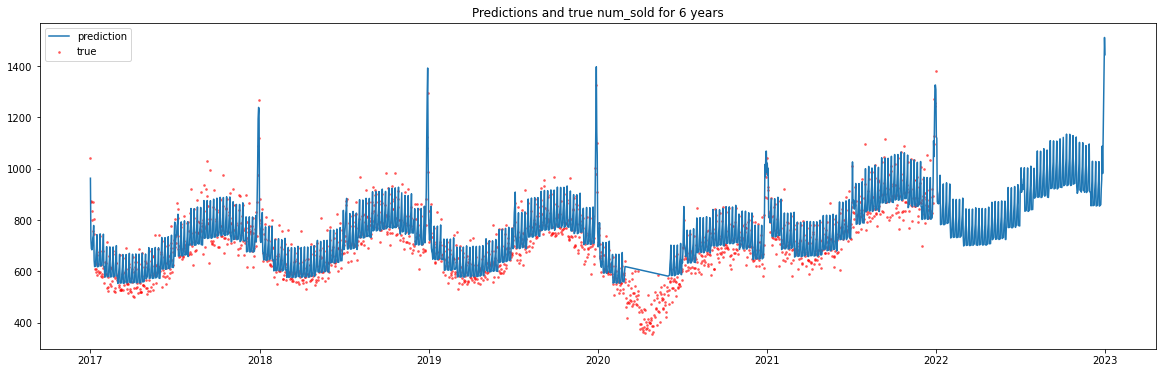

In [225]:
model2 = build_model(X_scaled, y.ravel(), 'ridge')
resid_plot('Canada', 'Kagglazon', 'Using LLMs to Improve Your Coding', model2, make_features2, features)

adding date features ...
adding spline features ...
adding GDP features ...
adding holiday features ...
adding dummies ...
adding fourier ...
adding Japan holiday ...


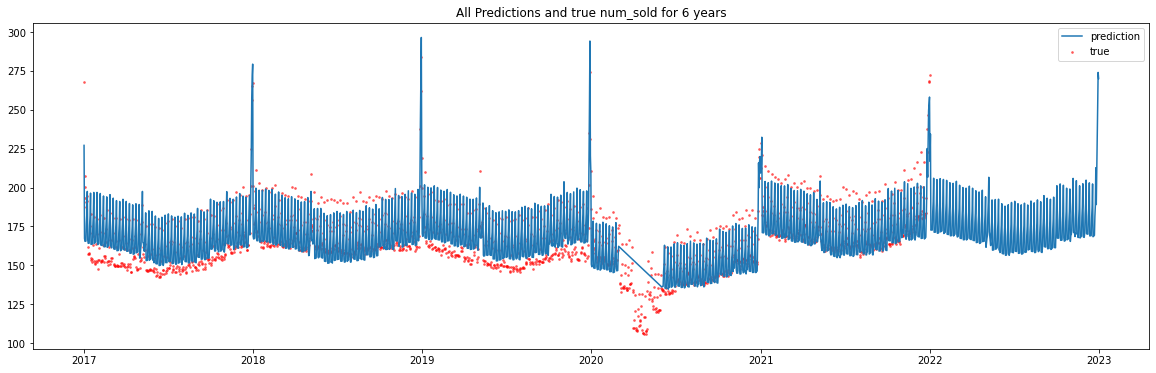

In [132]:
predict_plot(model2, make_features2, features)

In [226]:
# train_eng2.drop('pred', axis=1, inplace=True)
train_eng2['pred'] = np.exp(model2.predict(scaler.transform(train_eng2.drop(['id','num_sold','date'], axis=1))))
group_date = train_eng2.groupby(train_eng2['date'])
residuals = (group_date.pred.sum() - group_date.num_sold.sum()) / (group_date.pred.sum() + group_date.num_sold.sum()) * 200

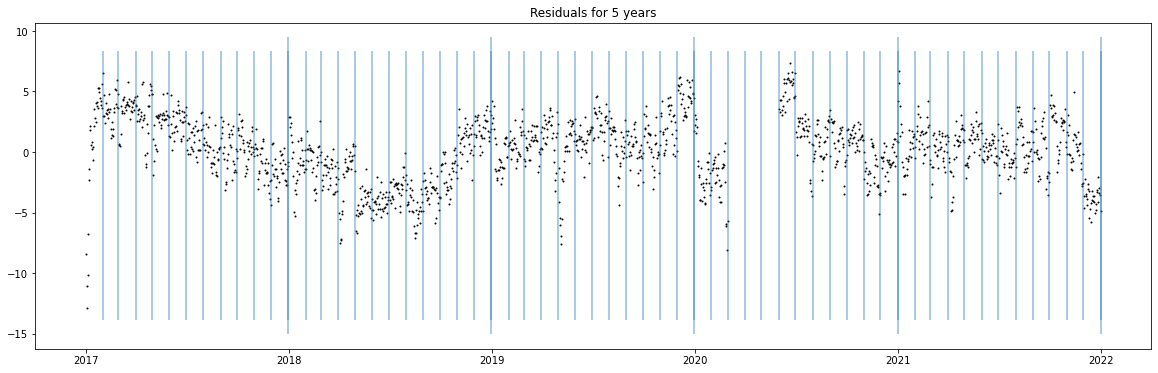

In [227]:
plot_all_residuals(residuals)

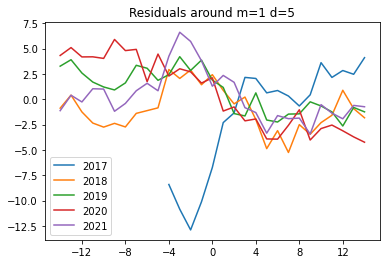

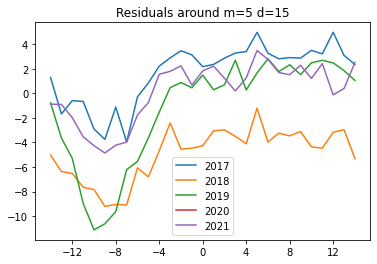

In [211]:
plot_around(residuals, 1, 5, 15)
plot_around(residuals, 5, 15, 15)

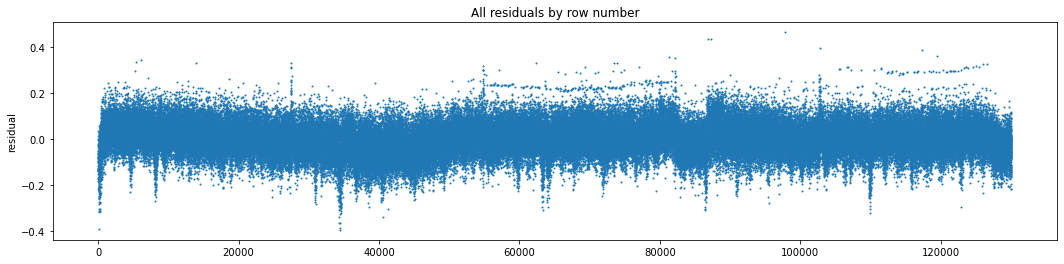

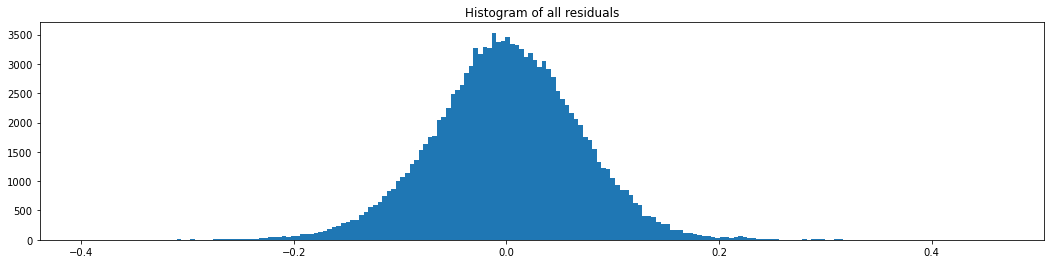

Standard deviation of log residuals: 0.069


In [228]:
residuals = np.log(train_eng2.pred) - np.log(train_eng2.num_sold)
plt.figure(figsize=(18, 4))
plt.scatter(np.arange(len(residuals)), residuals, s=1)
plt.title('All residuals by row number')
plt.ylabel('residual')
plt.show()
plt.figure(figsize=(18, 4))
plt.hist(residuals, bins=200)
plt.title('Histogram of all residuals')
plt.show()
print(f"Standard deviation of log residuals: {residuals.std():.3f}")

In [229]:
train_eng2['residuals'] = residuals

In [230]:
train_eng2['DayofYear'] = train_eng2.date.dt.dayofyear
train_eng2.loc[(train_eng2.date.dt.year != 2020) & (train_eng2.date.dt.month >= 3), 'DayofYear'] += 1

from scipy.stats import norm
print("Look for residuals beyond:", norm.ppf([0.5/365, 364.5/365]))

rr = train_eng2.residuals.groupby(train_eng2.DayofYear).mean()
rrstd = rr.std()
print(f"Standard deviation when grouped by dayofyear: {rrstd:.5f}")
rrdf = pd.DataFrame({'residual': rr, 'z_score': rr / rrstd, 'date': pd.date_range('2020-01-01', '2020-12-31')})
rrdf[rrdf.z_score.abs() > 3]

Look for residuals beyond: [-2.99552527  2.99552527]
Standard deviation when grouped by dayofyear: 0.01235


,residual,z_score,date
DayofYear,,,
60,-0.090385,-7.321511,2020-02-29
97,-0.037293,-3.020888,2020-04-06
124,-0.038521,-3.120367,2020-05-03
126,-0.045868,-3.715436,2020-05-05
127,-0.045288,-3.668510,2020-05-06


In [231]:
train_eng2['country'] = list(train_data_ori.loc[~train_data_ori.date.between(pd.Timestamp('2020-03-01'),pd.Timestamp('2020-05-31')), 'country'])
rr = train_eng2.residuals.groupby([train_eng2.country, train_eng2.DayofYear]).mean()
rrstd = rr.std()
print(f"Standard deviation when grouped by country and dayofyear: {rrstd:.5f}")
rrdf = pd.DataFrame({'residual': rr, 'z_score': rr / rrstd, 'date': np.datetime64('2018-12-31') + pd.to_timedelta(rr.index.get_level_values(1), 'D')})
rrdf[rrdf.z_score.abs() > 3]

Standard deviation when grouped by country and dayofyear: 0.02399


residual   z_score       date
country   DayofYear                               
Argentina 60        -0.181597 -7.568369 2019-03-01
          95        -0.081628 -3.401991 2019-04-05
          96        -0.113800 -4.742834 2019-04-06
          97        -0.136932 -5.706906 2019-04-07
          98        -0.131584 -5.483987 2019-04-08
          99        -0.109143 -4.548726 2019-04-09
          126       -0.077586 -3.233521 2019-05-06
          127       -0.083385 -3.475221 2019-05-07
          151       -0.076454 -3.186340 2019-05-31
          174       -0.081845 -3.411049 2019-06-23
          175       -0.087827 -3.660329 2019-06-24
          176       -0.092004 -3.834436 2019-06-25
          177       -0.078690 -3.279540 2019-06-26
          347       -0.074663 -3.111695 2019-12-13
          348       -0.075512 -3.147107 2019-12-14
Estonia   1         -0.081187 -3.383596 2019-01-01
          60        -0.115147 -4.798964 2019-03-01
          61        -0.087460 -3.645058 2019-03-02
          126       -0.074481 -3.104137 2019-05-06
          127       -0.074291 -3.096200 2019-05-07
          178       -0.080113 -3.338835 2019-06-27
          237       -0.080643 -3.360962 2019-08-25
          238       -0.073467 -3.061865 2019-08-26
Japan     1          0.166962  6.958430 2019-01-01
          2          0.091474  3.812345 2019-01-02
          60        -0.142672 -5.946107 2019-03-01
          123       -0.076817 -3.201486 2019-05-03
          124       -0.078496 -3.271463 2019-05-04
          228       -0.102990 -4.292278 2019-08-16
          229       -0.085426 -3.560294 2019-08-17
          230       -0.080776 -3.366481 2019-08-18
          269       -0.078849 -3.286163 2019-09-26
          270       -0.081743 -3.406804 2019-09-27
          271       -0.092233 -3.843961 2019-09-28
          272       -0.083917 -3.497395 2019-09-29
          332       -0.073151 -3.048693 2019-11-28
          333       -0.085235 -3.552320 2019-11-29
Spain     10        -0.090965 -3.791141 2019-01-10
          11        -0.080672 -3.362133 2019-01-11
          126       -0.079337 -3.306521 2019-05-06
          127       -0.073653 -3.069627 2019-05-07
          233       -0.076827 -3.201903 2019-08-21

In [232]:
model1_smape = calculate_smape(np.array(train_eng.num_sold), np.array(train_eng.pred))
print(f'Model 1 SMAPE: {model1_smape}')

Model 1 SMAPE: 9.2883


In [233]:
model2_smape = calculate_smape(np.array(train_eng2.num_sold), np.array(train_eng2.pred)*1)
print(f'Model 2 SMAPE: {model2_smape}')

Model 2 SMAPE: 5.3796


## Training and Validation

In [235]:
import pickle

In [264]:
def train_model(train, val, fold):
    X_train = train[features]
    y_train = np.log(train['num_sold'])
    X_val = val[features]
    y_val =val['num_sold']
    scaler = StandardScaler()
    X_tr_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    model = Ridge()
    model.fit(X_tr_scaled, y_train)
    
    y_hat = np.exp(model.predict(X_val_scaled))
#     print(y_hat)
    oof.update(pd.Series(y_hat, index=X_val.index))
    smape_bc = calculate_smape(np.array(y_val),np.array(y_hat)) 
    smape = calculate_smape(np.array(y_val)*1.25,np.array(y_hat))
    print(f"Fold {run}.{fold} | {str(datetime.now() - start_time)[-12:-7]}"
          f" | SMAPE BC: {smape_bc:.5f} | SMAPE AC: {smape:.5f}")
    scores.append(smape_bc)
    
    if fold == 0:
        plt.figure(figsize=(10, 10))
        plt.scatter(y_val, y_hat, s=1, color='r')
        plt.plot([plt.xlim()[0], plt.xlim()[1]], [plt.xlim()[0], plt.xlim()[1]], '--', color='k')
        plt.gca().set_aspect('equal')
        plt.xlabel('y_true')
        plt.ylabel('y_pred')
        plt.title('OOF Predictions')
        plt.show()
        
    return scaler, model

In [265]:
def run_model(method='group'):
    if method=='group':
        print('Training with group fold')
        kf = GroupKFold(n_splits=5)
        for fold, (train_idx, val_idx) in enumerate(kf.split(train_eng2, groups=train_eng2.date.dt.year)):
            train = train_eng2.iloc[train_idx]
            val = train_eng2.iloc[val_idx]
            print(set(train.Year))
            train_model(train, val, fold)
    elif method=='splitcv':
        print('Training with time split cv')
        tscv = TimeSeriesSplit(n_splits=3, test_size=27390)
        for fold, (train_idx, val_idx) in enumerate(tscv.split(train_eng2)):
            train = train_eng2.iloc[train_idx]
            val = train_eng2.iloc[val_idx]
            print(set(train.Year))
            print(set(val.Year))
            train_model(train, val, fold)

In [257]:
train_eng2 = make_features2(train_data_ori)

adding date features ...
adding spline features ...
adding GDP features ...
adding holiday features ...
adding dummies ...
adding fourier ...
adding independence days ...
adding Japan holiday ...


Training with time split cv
{2017, 2018}
{2018, 2019}
Fold 0.0 | 00:00 | SMAPE BC: 9.31160 | SMAPE AC: 14.01570


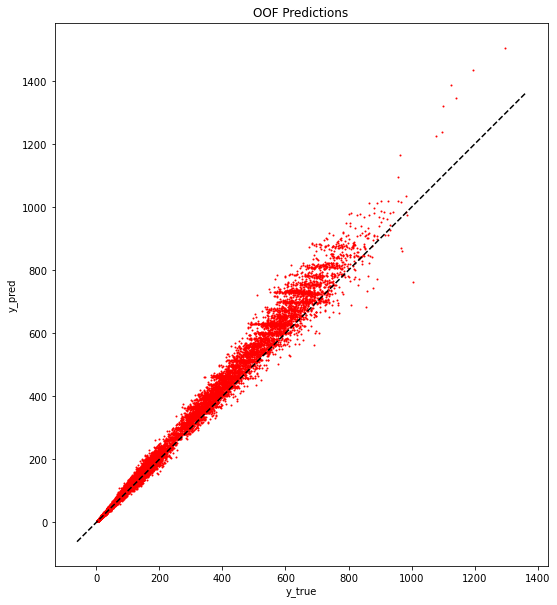

{2017, 2018, 2019}
{2019, 2020}
Fold 0.1 | 00:01 | SMAPE BC: 6.01450 | SMAPE AC: 19.20680
{2017, 2018, 2019, 2020}
{2020, 2021}
Fold 0.2 | 00:02 | SMAPE BC: 5.34950 | SMAPE AC: 21.90910
Average SMAPE: 6.89187


In [266]:
runs = 1
np.random.seed(5)
start_time = datetime.now()
# index_2020 = train_eng2.loc[train_eng2['date'].dt.year==2020].index
# train_eng2_excovid = train_eng2.loc[train_eng2['date'].dt.year!=2020]
oof = pd.Series(0.0, index=train_eng2.index)
scores = []
for run in range(runs):
    run_model('splitcv')

print(f"Average SMAPE: {sum(scores) / len(scores):.5f}")
with open('oof.pickle', 'wb') as handle: 
    pickle.dump(oof, handle)

adding date features ...
adding spline features ...
adding GDP features ...
adding holiday features ...
adding dummies ...
adding fourier ...
adding independence days ...
adding Japan holiday ...


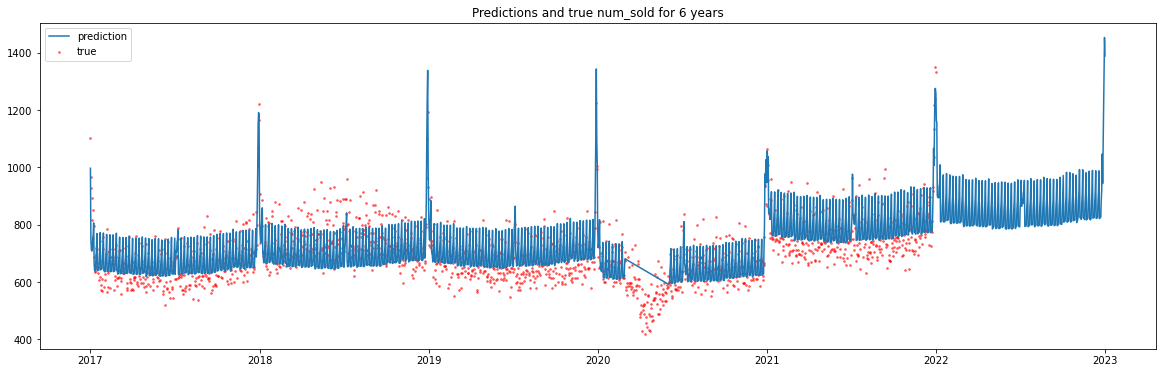

adding date features ...
adding spline features ...
adding GDP features ...
adding holiday features ...
adding dummies ...
adding fourier ...
adding independence days ...
adding Japan holiday ...


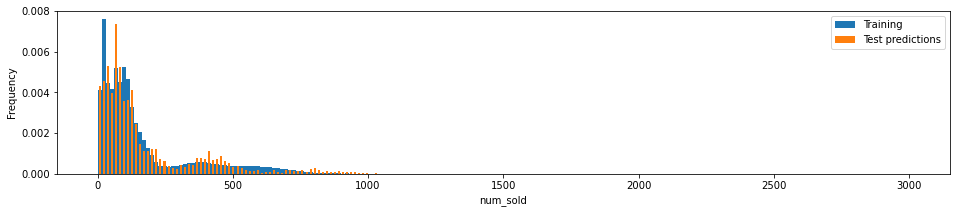

,id,num_sold
0,136950,48.250080
1,136951,49.972510
2,136952,7.628141
3,136953,46.581859
4,136954,40.158124
...,...,...
27370,164320,745.782149
27371,164321,717.338025
27372,164322,109.437062
27373,164323,666.629784


In [267]:
X_train = train_eng2[features]
y_train = np.log(train_eng2['num_sold'])

scaler = StandardScaler()
X_tr_scaled = scaler.fit_transform(X_train)

modelLR = build_model(X_tr_scaled, y_train, 'ridge')
# Quick check for debugging
resid_plot('Canada', 'Kagglazon', 'Using LLMs to Train More LLMs', modelLR, make_features2, features) 

# Inference for test
test_hat_list = []
test_hat_list.append(np.exp(modelLR.predict(scaler.transform(make_features2(test_data_ori)[features]))))

# Create the submission file
sub = test_data_ori[['id']].copy()
sub['num_sold'] = sum(test_hat_list) / len(test_hat_list)
# sub.to_csv('submissions/submission8.csv', index=False)

# Plot the distribution of the test predictions
plt.figure(figsize=(16,3))
plt.hist(train_eng2['num_sold'], bins=np.linspace(0, 3000, 201),
         density=True, label='Training')
plt.hist(sub['num_sold'], bins=np.linspace(0, 3000, 201),
         density=True, rwidth=0.5, label='Test predictions')
plt.xlabel('num_sold')
plt.ylabel('Frequency')
plt.legend()
plt.show()

sub

In [269]:
train_eng2.columns

Index(['id', 'date', 'num_sold', 'Year', 'Qtr', 'Month', 'Month_Sin', 'Day',
       'Day_Sin', 'Weekday', 'Week_Nb', 'Is_Weekend', 'DayofYear', 'is_fri',
       'is_sat', 'is_weekday', 'Is_ImpDate', 'is_covid', 'spline0', 'spline1',
       'spline2', 'spline3', 'gdp', 'Is_Holiday', 'Christmas_25',
       'Christmas_26', 'Christmas_27', 'Christmas_28', 'Christmas_29',
       'Christmas_30', 'Christmas_31', 'newYear_1', 'newYear_2', 'newYear_3',
       'newYear_4', 'newYear_5', 'newYear_6', 'newYear_7', 'newYear_8',
       'newYear_9', 'country_Estonia', 'country_Canada', 'country_Argentina',
       'country_Spain', 'country_Japan', 'Using LLMs to Train More LLMs',
       'Using LLMs to Win More Kaggle Competitions',
       'Using LLMs to Win Friends and Influence People',
       'Using LLMs to Improve Your Coding', 'Using LLMs to Write Better',
       'store_Kaggle Learn', 'store_Kaggle Store', 'store_Kagglazon', 'sin1',
       'cos1', 'IYC_sin1', 'IYC_cos1', 'TTL_sin1', 'TTL_cos1', 'WM

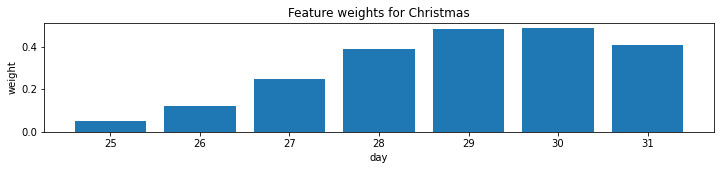

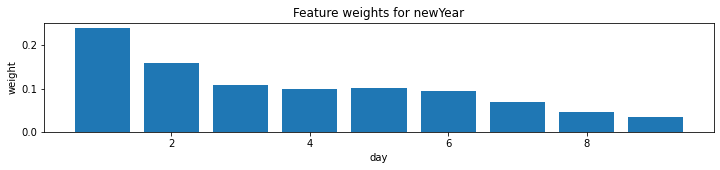

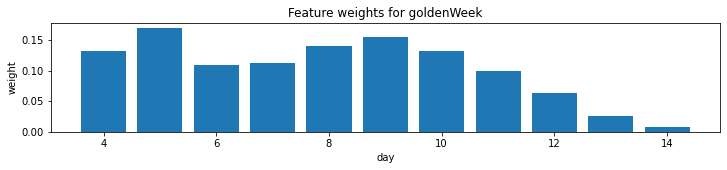

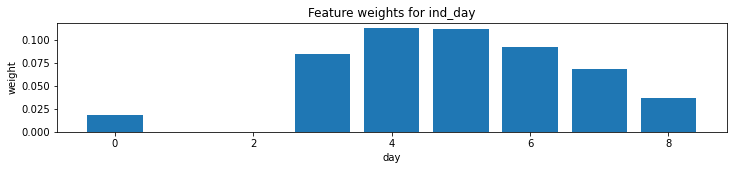

In [270]:
weights = pd.Series(modelLR.coef_, features)
weights_scaled = weights / scaler.scale_

def plot_feature_weights_numbered(prefix):
    prefix_features = [f for f in features if f.startswith(prefix)]
    plt.figure(figsize=(12, 2))
    plt.bar([int(f[len(prefix)+1:]) for f in prefix_features], weights_scaled[prefix_features])
    plt.title(f'Feature weights for {prefix}')
    plt.ylabel('weight')
    plt.xlabel('day')
    plt.show()
    
plot_feature_weights_numbered('Christmas')
plot_feature_weights_numbered('newYear')
plot_feature_weights_numbered('goldenWeek')
plot_feature_weights_numbered('ind_day')

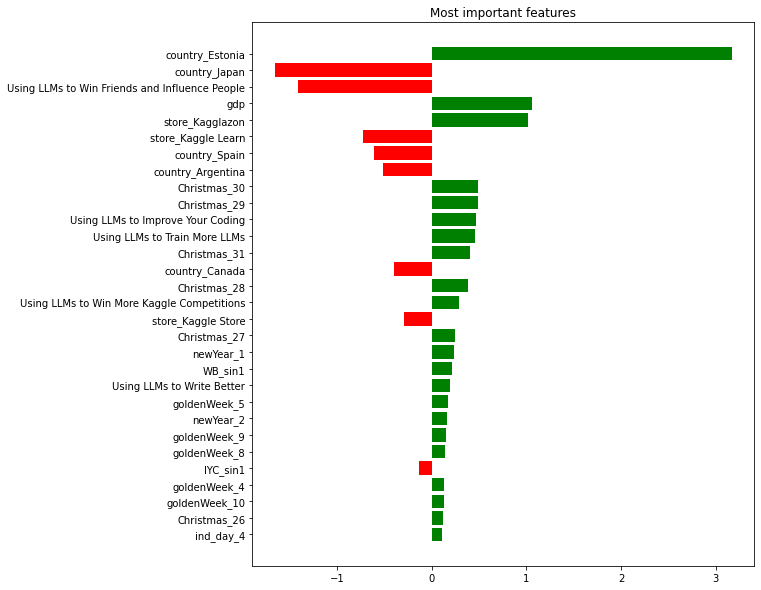

In [271]:
ws_sorted = weights_scaled.iloc[np.argsort(-np.abs(weights_scaled))]
ws_plot = ws_sorted.head(30)
plt.figure(figsize=(9, len(ws_plot) / 3))
plt.barh(np.arange(len(ws_plot)), ws_plot, color=ws_plot.apply(lambda ws: 'green' if ws >= 0 else 'red'))
plt.yticks(np.arange(len(ws_plot)), ws_plot.index)
plt.gca().invert_yaxis()
plt.title('Most important features')
plt.show()

In [273]:
sub.num_sold

0         48.250080
1         49.972510
2          7.628141
3         46.581859
4         40.158124
            ...    
27370    745.782149
27371    717.338025
27372    109.437062
27373    666.629784
27374    512.818426
Name: num_sold, Length: 27375, dtype: float64

## Creating csv file for training with ensemble model

In [274]:
def holiday_mapper2(data):
    df = data.copy()
    period = range(2017, 2022, 1)
    for i in list(set(train_data_ori['country'])):
        holidays = CountryHoliday(i, years=period)
        df['Holiday'] = df['date'].map(holidays).fillna('Not Holiday')
        
        df['Holiday'] = df['Holiday'].apply(lambda x: x 
                                                  if x != 'Asunción de la Virgen (Trasladado)' 
                                                  else 'Not Holiday')
        df['Is_Holiday'] = np.where(df['Holiday']=='Not Holiday',0,1)
    
    df.drop('Holiday', axis=1,inplace=True)

#     newyear_jan_date = df.date.apply(lambda date: pd.Timestamp(date.year,1,1))
#     newyear_dec_date = df.date.apply(lambda date: pd.Timestamp(date.year,12,31))
#     for day in (list(range(11))):
#         df[f'newYearJan_{day}'] = np.where(df.country!='Japan',(df.date - newyear_jan_date).dt.days.eq(day),0)
#     for day in (list(range(-5,1))):
#         df[f'newYearDec_{day}'] = np.where(df.country!='Japan',(df.date - newyear_dec_date).dt.days.eq(day),0)
    
#     # Applying christmas and excluding Japan
#     christmas_date = df.date.apply(lambda date: pd.Timestamp(date.year,12,25))       
#     for day in (list(range(-4,7))):
#         df[f'Christmas_{day}'] = np.where(df.country!='Japan',(df.date - christmas_date).dt.days.eq(day),0)

#     for d in range(25,32):
#         c_day = df.date.apply(lambda date: pd.Timestamp(date.year,12,d))
#         df[f'Christmas_{d}'] = np.where(df.country!='Japan',(df.date - c_day).dt.days.eq(0),0)
#     for d in range(1,10):
#         ny_day = df.date.apply(lambda date: pd.Timestamp(date.year,1,d))
#         df[f'newYear_{d}'] = (df.date - ny_day).dt.days.eq(0)    
        
    return df

In [290]:
def make_features3(df):
    print("adding date features ...")
    tempDf = create_dateFeature(df)
    print("adding spline features ...")
    Spline_Prf = MakeSplineFtre()
    tempDf = tempDf.merge(Spline_Prf, on = 'Day', how = 'left')
    print("adding GDP features ...")
    tempDf = add_gdp(tempDf)
    print("adding holiday features ...")
    tempDf = holiday_mapper2(tempDf)
    
    countries = list(set(train_data_ori['country']))
    products = list(set(train_data_ori['product']))
    stores = list(set(train_data_ori['store']))
#     products.remove('Using LLMs to Win Friends and Influence People')
#     stores.remove('Kaggle Learn')
    print("adding dummies ...")
    for c in countries:
        tempDf[f'country_{c}'] = tempDf.country == c
        
    for p in products:
        tempDf[f'{p}'] = tempDf['product'] == p
        
    for s in stores:
        tempDf[f'store_{s}'] = tempDf.store == s
        
    print("adding fourier ...")    
    tempDf = add_fourier(tempDf)
    tempDf.drop(['store','country','product'], axis=1, inplace=True)
    return tempDf

In [291]:
out_csv = make_features3(train_data_ori)
out_csv

adding date features ...
adding spline features ...
adding GDP features ...
adding holiday features ...
adding dummies ...
adding fourier ...


,id,date,num_sold,Year,Qtr,Month,Month_Sin,Day,Day_Sin,Weekday,...,sin1,cos1,IYC_sin1,IYC_cos1,TTL_sin1,TTL_cos1,WMKC_sin1,WMKC_cos1,WB_sin1,WB_cos1
0,0,2017-01-01,63,2017,1,1,5.000000e-01,1,0.5,6,...,5.000000e-01,0.866025,5.000000e-01,0.866025,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
1,1,2017-01-01,66,2017,1,1,5.000000e-01,1,0.5,6,...,5.000000e-01,0.866025,0.000000e+00,0.000000,5.000000e-01,0.866025,0.000000e+00,0.000000,0.000000e+00,0.000000
2,2,2017-01-01,9,2017,1,1,5.000000e-01,1,0.5,6,...,5.000000e-01,0.866025,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
3,3,2017-01-01,59,2017,1,1,5.000000e-01,1,0.5,6,...,5.000000e-01,0.866025,0.000000e+00,0.000000,0.000000e+00,0.000000,5.000000e-01,0.866025,0.000000e+00,0.000000
4,4,2017-01-01,49,2017,1,1,5.000000e-01,1,0.5,6,...,5.000000e-01,0.866025,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,5.000000e-01,0.866025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136945,136945,2021-12-31,700,2021,4,12,-2.449294e-16,31,-0.5,4,...,-2.449294e-16,1.000000,-2.449294e-16,1.000000,-0.000000e+00,0.000000,-0.000000e+00,0.000000,-0.000000e+00,0.000000
136946,136946,2021-12-31,752,2021,4,12,-2.449294e-16,31,-0.5,4,...,-2.449294e-16,1.000000,-0.000000e+00,0.000000,-2.449294e-16,1.000000,-0.000000e+00,0.000000,-0.000000e+00,0.000000
136947,136947,2021-12-31,111,2021,4,12,-2.449294e-16,31,-0.5,4,...,-2.449294e-16,1.000000,-0.000000e+00,0.000000,-0.000000e+00,0.000000,-0.000000e+00,0.000000,-0.000000e+00,0.000000
136948,136948,2021-12-31,641,2021,4,12,-2.449294e-16,31,-0.5,4,...,-2.449294e-16,1.000000,-0.000000e+00,0.000000,-0.000000e+00,0.000000,-2.449294e-16,1.000000,-0.000000e+00,0.000000


In [292]:
test_eng_out = make_features3(test_data_ori)
test_eng_out

adding date features ...
adding spline features ...
adding GDP features ...
adding holiday features ...
adding dummies ...
adding fourier ...


,id,date,Year,Qtr,Month,Month_Sin,Day,Day_Sin,Weekday,Week_Nb,...,sin1,cos1,IYC_sin1,IYC_cos1,TTL_sin1,TTL_cos1,WMKC_sin1,WMKC_cos1,WB_sin1,WB_cos1
0,136950,2022-01-01,2022,1,1,5.000000e-01,1,0.5,5,52,...,5.000000e-01,0.866025,5.000000e-01,0.866025,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
1,136951,2022-01-01,2022,1,1,5.000000e-01,1,0.5,5,52,...,5.000000e-01,0.866025,0.000000e+00,0.000000,5.000000e-01,0.866025,0.000000e+00,0.000000,0.000000e+00,0.000000
2,136952,2022-01-01,2022,1,1,5.000000e-01,1,0.5,5,52,...,5.000000e-01,0.866025,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
3,136953,2022-01-01,2022,1,1,5.000000e-01,1,0.5,5,52,...,5.000000e-01,0.866025,0.000000e+00,0.000000,0.000000e+00,0.000000,5.000000e-01,0.866025,0.000000e+00,0.000000
4,136954,2022-01-01,2022,1,1,5.000000e-01,1,0.5,5,52,...,5.000000e-01,0.866025,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,5.000000e-01,0.866025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27370,164320,2022-12-31,2022,4,12,-2.449294e-16,31,-0.5,5,52,...,-2.449294e-16,1.000000,-2.449294e-16,1.000000,-0.000000e+00,0.000000,-0.000000e+00,0.000000,-0.000000e+00,0.000000
27371,164321,2022-12-31,2022,4,12,-2.449294e-16,31,-0.5,5,52,...,-2.449294e-16,1.000000,-0.000000e+00,0.000000,-2.449294e-16,1.000000,-0.000000e+00,0.000000,-0.000000e+00,0.000000
27372,164322,2022-12-31,2022,4,12,-2.449294e-16,31,-0.5,5,52,...,-2.449294e-16,1.000000,-0.000000e+00,0.000000,-0.000000e+00,0.000000,-0.000000e+00,0.000000,-0.000000e+00,0.000000
27373,164323,2022-12-31,2022,4,12,-2.449294e-16,31,-0.5,5,52,...,-2.449294e-16,1.000000,-0.000000e+00,0.000000,-0.000000e+00,0.000000,-2.449294e-16,1.000000,-0.000000e+00,0.000000


In [293]:
out_csv.to_csv('train_engineered.csv', index=False)

In [294]:
test_eng_out.to_csv('test_engineered.csv', index=False)

# Submissions

Based on submission scores which only calculates SMAPE based on data January-March, current model predict lower sales. Applying correction multiplication can provide lower score, however I currently need to either validate those date ranges or apply correction to SMAPE.  
Current plan is to submit one without correction and one with correction

In [354]:
test_eng = make_features2(test_data_ori)
test_eng

adding date features ...
adding spline features ...
adding GDP features ...
adding holiday features ...
adding dummies ...
adding fourier ...
adding Japan holiday ...


,id,date,Year,Qtr,Month,Month_Sin,Day,Day_Sin,Weekday,Week_Nb,...,goldenWeek_5,goldenWeek_6,goldenWeek_7,goldenWeek_8,goldenWeek_9,goldenWeek_10,goldenWeek_11,goldenWeek_12,goldenWeek_13,goldenWeek_14
0,136950,2022-01-01,2022,1,1,5.000000e-01,1,0.5,5,52,...,0,0,0,0,0,0,0,0,0,0
1,136951,2022-01-01,2022,1,1,5.000000e-01,1,0.5,5,52,...,0,0,0,0,0,0,0,0,0,0
2,136952,2022-01-01,2022,1,1,5.000000e-01,1,0.5,5,52,...,0,0,0,0,0,0,0,0,0,0
3,136953,2022-01-01,2022,1,1,5.000000e-01,1,0.5,5,52,...,0,0,0,0,0,0,0,0,0,0
4,136954,2022-01-01,2022,1,1,5.000000e-01,1,0.5,5,52,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27370,164320,2022-12-31,2022,4,12,-2.449294e-16,31,-0.5,5,52,...,0,0,0,0,0,0,0,0,0,0
27371,164321,2022-12-31,2022,4,12,-2.449294e-16,31,-0.5,5,52,...,0,0,0,0,0,0,0,0,0,0
27372,164322,2022-12-31,2022,4,12,-2.449294e-16,31,-0.5,5,52,...,0,0,0,0,0,0,0,0,0,0
27373,164323,2022-12-31,2022,4,12,-2.449294e-16,31,-0.5,5,52,...,0,0,0,0,0,0,0,0,0,0


In [358]:
y_hat = np.exp(model2.predict(scaler.transform(test_eng[features])))
y_hat

array([ 48.29832005,  49.93104633,   7.64680298, ..., 109.59902397,
       671.1408806 , 508.90555217])

In [433]:
sub = pd.DataFrame(zip(test_eng.id,y_hat*1.25), columns=['id','num_sold'])
sub

,id,num_sold
0,136950,60.372900
1,136951,62.413808
2,136952,9.558504
3,136953,58.779290
4,136954,49.960110
...,...,...
27370,164320,931.508243
27371,164321,896.134552
27372,164322,136.998780
27373,164323,838.926101


In [425]:
best_df = pd.read_csv('submissions/submission9.csv')
best_df

,id,num_sold
0,136950,43.680831
1,136951,45.085839
2,136952,6.911869
3,136953,42.545582
4,136954,36.127652
...,...,...
27370,164320,611.035581
27371,164321,585.531258
27372,164322,89.670551
27373,164323,550.252365


In [434]:
sub.to_csv('submissions/submission16.csv', index=False)

In [397]:
sliced_ = test_eng.loc[test_eng['date'].between(pd.Timestamp('2022-01-01'), pd.Timestamp('2022-03-01'))]
sliced_.date

0      2022-01-01
1      2022-01-01
2      2022-01-01
3      2022-01-01
4      2022-01-01
          ...    
4495   2022-03-01
4496   2022-03-01
4497   2022-03-01
4498   2022-03-01
4499   2022-03-01
Name: date, Length: 4500, dtype: datetime64[ns]

In [426]:
best_sliced = best_df.loc[best_df.id.isin(sliced_.id)]
cur_sub = sub.loc[sub.id.isin(sliced_.id)]

best_sliced['date'] = sliced_.date
cur_sub['date'] = sliced_.date

In [427]:
best_sliced.num_sold.mean()

217.57002847934604

In [428]:
cur_sub.num_sold.mean()

221.05875888852896

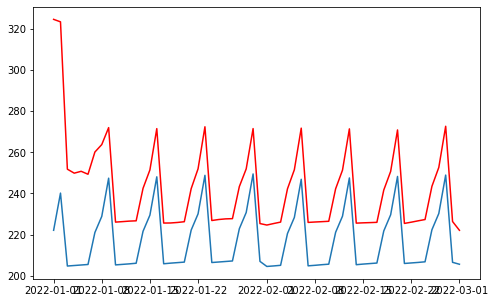

In [430]:
import seaborn as sns
group_best = best_sliced.groupby('date').mean()
group_cur = cur_sub.groupby('date').mean()
plt.figure(figsize=(8,5))
plt.plot(group_best.index, group_best.num_sold)
plt.plot(group_cur.index, group_cur.num_sold*1.1, color='r')